# deskripsi library yang digunakan

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Memanggil Dataset

In [2]:
df = pd.read_csv('toyota.csv')

# Deskripsi Dataset

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


<Axes: >

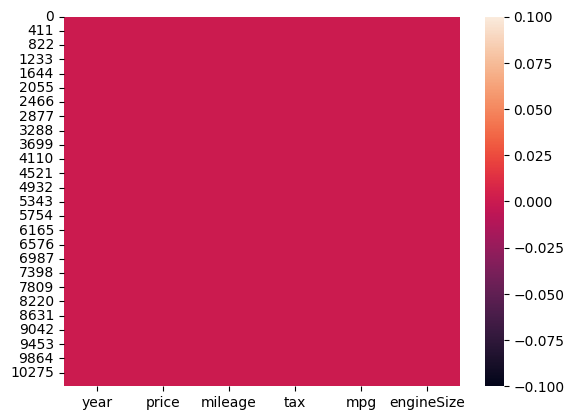

In [20]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


# Visualisasi Data

<Axes: >

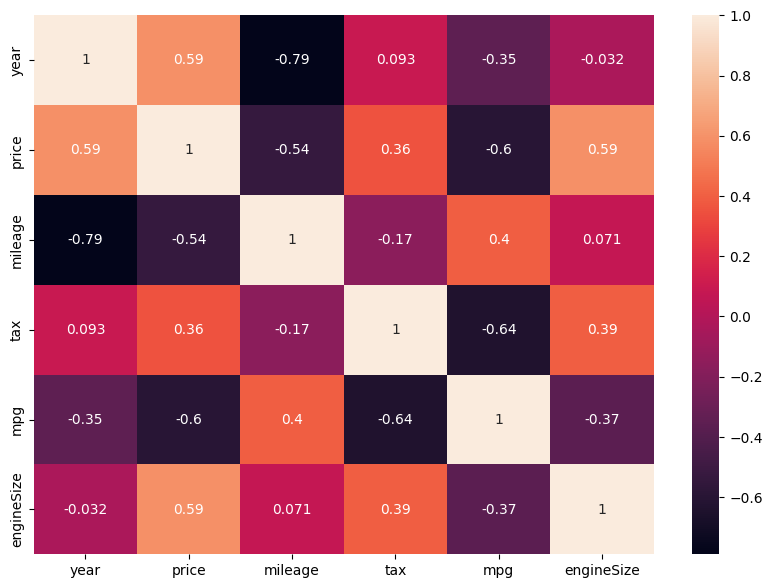

In [32]:
df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

# Jumlah mobil berdasarkan model

In [8]:
df = pd.read_csv('toyota.csv')
models = df.groupby('model', as_index=False).count()[['model', 'tax']]
models = models.rename(columns={'tax': 'numberOfCars'})
models = models.sort_values(by='numberOfCars', ascending=True).reset_index(drop=True)

   model  numberOfCars
0     A2             1
1    RS7             1
2     S5             3
3     S8             4
4    SQ7             8
5     S4            12
6    SQ5            16
7     S3            18
8     R8            28
9    RS5            29
10   RS4            31
11   RS3            33
12   RS6            39
13    Q8            69
14    A8           118
15    A7           122
16    TT           336
17    Q7           397
18    A6           748
19    Q2           822
20    Q5           877
21    A5           882
22    A1          1347
23    A4          1381
24    Q3          1417
25    A3          1929


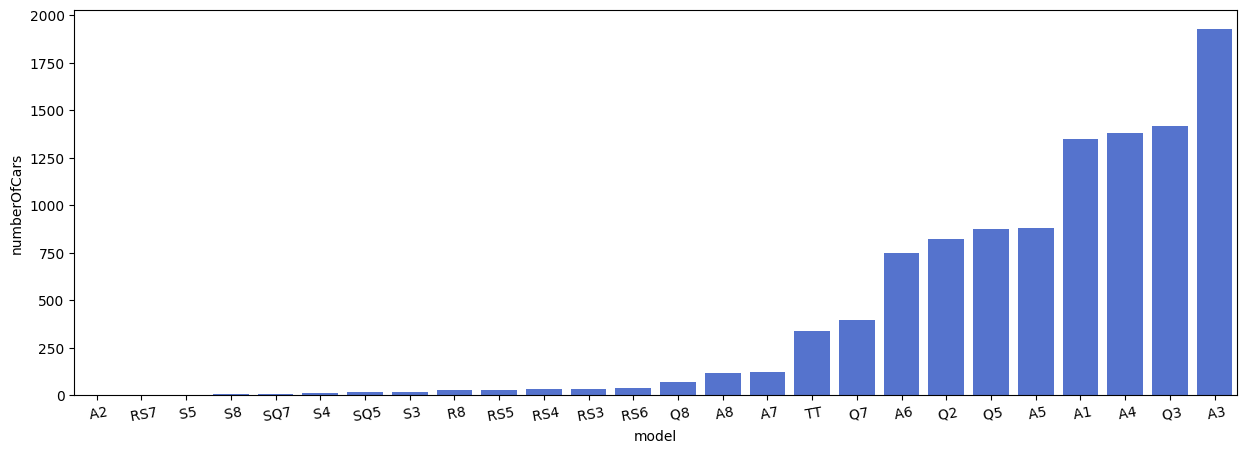

In [30]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=10)
print(models)

# ukuran mesin

In [10]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

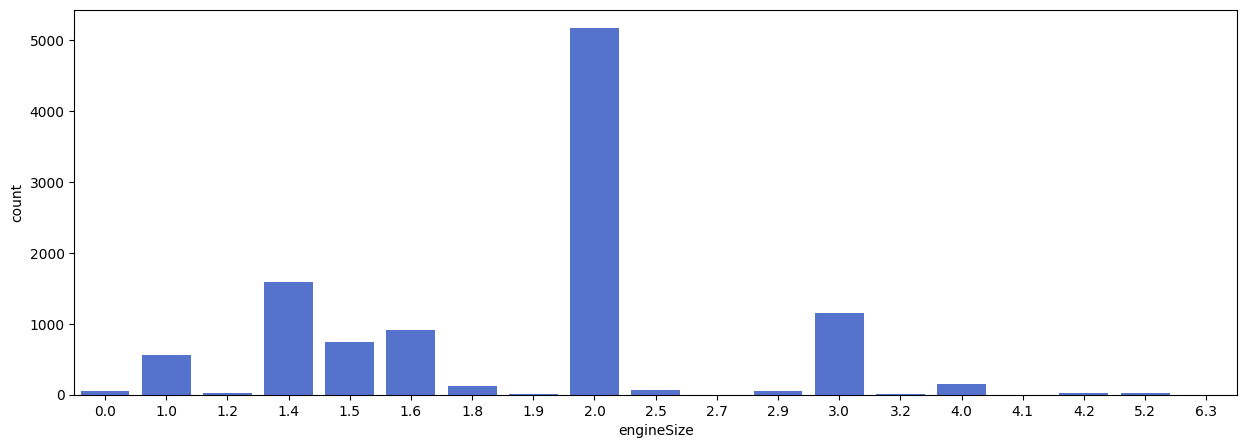

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

# distribusi mileage

<Figure size 1500x500 with 0 Axes>

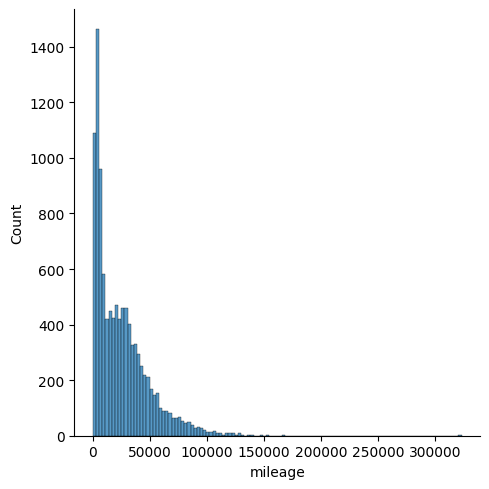

In [34]:
plt.figure(figsize=(15,5))
sns.displot(df['mileage'])

# distribusi harga mobil

<Figure size 1500x500 with 0 Axes>

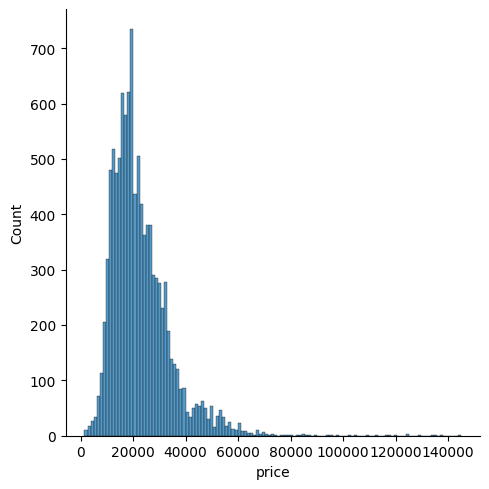

In [35]:
plt.figure(figsize=(15,5))
sns.displot(df['price'])

# seleksi fitur

In [14]:
features = ['year','mileage','tax','mpg','engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((10668, 5), (10668,))

# split data training dan data testing

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(2667,)

# membuat model regresi linier

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

# membuat inputan model regresi linier

In [17]:
#year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2
input_data = np.array([[2019,5000,145,30.2,2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR :', prediction)

Estimasi harga mobil dalam EUR : [33720.47965492]


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [18]:
import pickle

filename = 'estimasi_mbil.sav'
pickle.dump(lr,open(filename,'wb'))